In [2]:
from pyraysum import prs, Geometry, Model, Control
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from codes_RF.prs_utils import *

In [3]:
def all(baz, slow, thickn, rho, vp, vs, dip, strike, plunge, trend, ani, scale = 20, print_model = False, plot_model = False):
    thickn = np.array(thickn) * 1000
    flag = [1 if i == 0 else 0 for i in ani]
    model = Model(thickn, rho, vp, vs=vs, strike=strike, dip=dip, flag=flag, plunge=plunge, trend=trend, ani = ani)
    if print_model:
        print("The Model configuration is as below:")
        print(model)
    # print(plunge, Trend, ani)
    geom = Geometry(baz, slow)
    npts = 1000
    dt = 0.2
    rc = Control(wvtype="P", rot=1, mults=2, verbose=False, npts=npts, dt=dt, align=0)
    result = prs.run(model, geom, rc, rf=True)
    result.filter('rfs', 'lowpass', freq=1., zerophase=True, corners=2)
    if plot_model:
        result.plot('rfs', tmin=-5, tmax=35, scale=scale)
        model.plot()
        # geom.plot()
    plt.show()
    
    return model, geom, result

In [4]:
# def model2l(l1depth, l1rho, l2rho, l1vp, l2vp, l1vs, l2vs, l2strike, l2dip, l1ani, l2ani):
#     baz = np.arange(0, 360, 6)
#     slow = 0.01#np.array([0.08, 0.07])
#     thickn = np.array([l1depth, 0])
#     rho = np.array([l1rho, l2rho])
#     vp = np.array([l1vp, l2vp])
#     vs = np.array([l1vs, l2vs])
#     strike = np.array([0, l2strike])
#     dip = np.array([0, l2dip])
#     plunge = np.array([0, 0])
#     trend = np.array([270, 0])
#     ani = np.array([l1ani, l2ani])
#     _, _, result = all(baz, slow, thickn, rho, vp, vs, dip, strike, plunge,
#                        trend, ani, scale = 200, print_model = False,
#                        plot_model = True)
#     # X, time = harm_dec_calc(result, sig_len = 1000)
#     # plot_har_dec(X, time)
    
# param1 = widgets.IntSlider(value=35, min=20, max=50, step=4, description='L1 Depth:', continuous_update=False)
# param2 = widgets.IntSlider(value=2000, min=1500, max=4000, step=100, description='L1 Density:', continuous_update=False)
# param3 = widgets.IntSlider(value=3000, min=1500, max=4000, step=100, description='L2 Density:', continuous_update=False)
# param4 = widgets.IntSlider(value=6500, min=6000, max=7500, step=250, description='L1 Vp:', continuous_update=False)
# param5 = widgets.IntSlider(value=8000, min=6000, max=9000, step=500, description='L2 Vp:', continuous_update=False)
# param6 = widgets.IntSlider(value=3000, min=3500, max=5000, step=250, description='L1 Vs:', continuous_update=False)
# param7 = widgets.IntSlider(value=4500, min=3500, max=6500, step=250, description='L2 Vs:', continuous_update=False)
# param8 = widgets.IntSlider(value=0, min=0, max=14, step=2, description='L2 Dip:', continuous_update=False)
# param9 = widgets.FloatSlider(value=0, min=0, max=360, step=90, description='L2 Strike:', continuous_update=False)
# param10 = widgets.FloatSlider(value=0, min=-20, max=20, step=5, description='L1 Anisotropy:', continuous_update=False)
# param11 = widgets.FloatSlider(value=0, min=-20, max=20, step=5, description='L2 Anisotropy:', continuous_update=False)
# widgets.interactive(model2l, l1depth=param1, l1rho=param2, l2rho=param3, l1vp=param4, l2vp=param5, l1vs=param6, l2vs=param7, l2dip=param8, l2strike=param9, l1ani=param10, l2ani=param11)

In [5]:
def model3l(l1depth, l2depth, l1rho, l2rho, l1vp, l2vp, l1vs, l2vs, l2strike, l2dip, l3dip, l2ani):
    baz = np.arange(0, 360, 12)
    slow = 0.01#np.array([0.08, 0.07])
    thickn = np.array([l1depth, l2depth, 0])
    rho = np.array([l1rho, l2rho, 3500])
    vp = np.array([l1vp, l2vp, 8200])
    vs = np.array([l1vs, l2vs, 5500])
    strike = np.array([0, l2strike, 0])
    dip = np.array([0, l2dip, l3dip])
    plunge = np.array([0, 10, 0])
    trend = np.array([0, 0, 0])
    ani = np.array([0, l2ani, 0])
    _, _, result = all(baz, slow, thickn, rho, vp, vs, dip, strike, plunge, trend, ani, scale = 200, print_model = False, plot_model = True)
    X, time = harm_dec_calc(result, sig_len = 1000)
    plot_har_dec(X, time)
    

param1 = widgets.IntSlider(value=20, min=5, max=30, step=5, description='L1 Depth:', continuous_update=False)
param2 = widgets.IntSlider(value=15, min=5, max=30, step=5, description='L2 Depth:', continuous_update=False)
param3 = widgets.IntSlider(value=2500, min=1500, max=3000, step=200, description='L1 Density:', continuous_update=False)
param4 = widgets.IntSlider(value=2500, min=1500, max=3000, step=200, description='L2 Density:', continuous_update=False)
param5 = widgets.IntSlider(value=6500, min=6000, max=7500, step=250, description='L1 Vp:', continuous_update=False)
param6 = widgets.IntSlider(value=6500, min=6000, max=7500, step=250, description='L2 Vp:', continuous_update=False)
param7 = widgets.IntSlider(value=3500, min=3000, max=4000, step=250, description='L1 Vs:', continuous_update=False)
param8 = widgets.IntSlider(value=3500, min=3000, max=4000, step=250, description='L2 Vs:', continuous_update=False)
param9 = widgets.IntSlider(value=0, min=-10, max=10, step=2, description='L2 Dip:', continuous_update=False)
param10 = widgets.FloatSlider(value=0, min=0, max=360, step=90, description='L2 Strike:', continuous_update=False)
param11 = widgets.FloatSlider(value=0, min=-10, max=10, step=2, description='L3 Dip:', continuous_update=False)
param12 = widgets.FloatSlider(value=0, min=-20, max=20, step=2, description='L2 Anisotropy:', continuous_update=False)
widgets.interactive(model3l, l1depth=param1, l2depth=param2, l1rho=param3, l2rho=param4, l1vp=param5, l2vp=param6, l1vs=param7, l2vs=param8, l2dip=param9, l2strike=param10, l3dip=param11, l2ani=param12)


interactive(children=(IntSlider(value=20, continuous_update=False, description='L1 Depth:', max=30, min=5, ste…

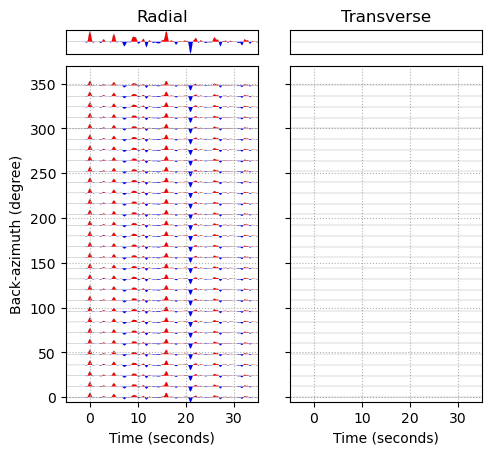

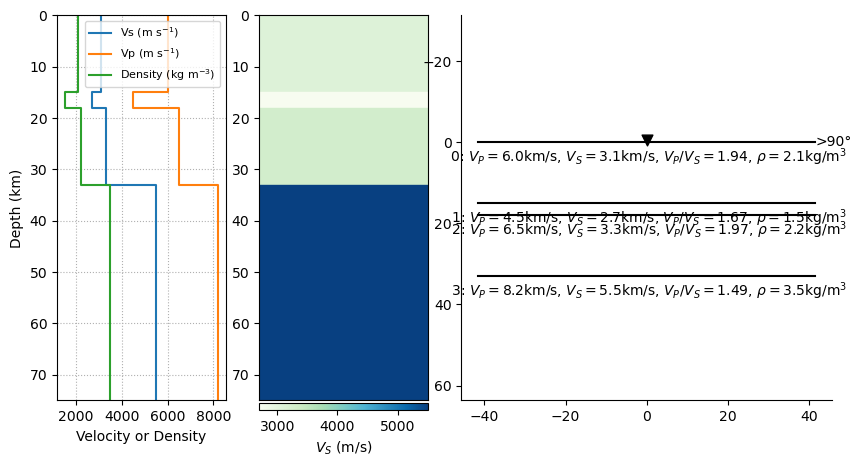

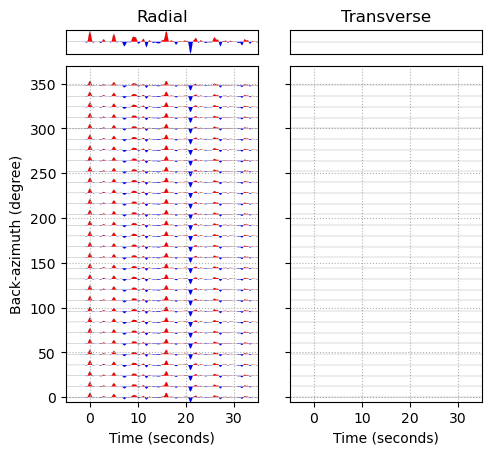

In [7]:
baz = np.arange(0, 360, 12)
slow = 0.01#np.array([0.08, 0.07])
thickn = np.array([15, 3, 15,  0])
rho = np.array([2100, 1500, 2200, 3500])
vp = np.array([6000, 4500, 6500, 8200])
vs = np.array([3100, 2700, 3300, 5500])
strike = np.array([0, 0, 0, 0])
dip = np.array([0, 0, 0, 0])
plunge = np.array([0, 0, 0, 0])
trend = np.array([0, 0, 0, 0])
ani = np.array([0, 0, 0, 0])
_, _, result = all(baz, slow, thickn, rho, vp, vs, dip, strike, plunge, trend, ani, scale = 200, print_model = False, plot_model = True)

result.plot('rfs', tmin=-5, tmax=35, scale=200)